_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_120 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_113 (MaxPoolin (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 72, 72, 64)        18496     
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 70, 70, 64)        36928     
_________________________________________________________________
max_pooling2d_114 (MaxPoolin (None, 35, 35, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 33, 33, 128)       73856     
__________

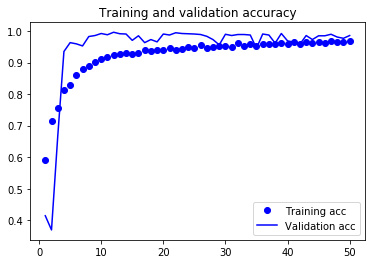

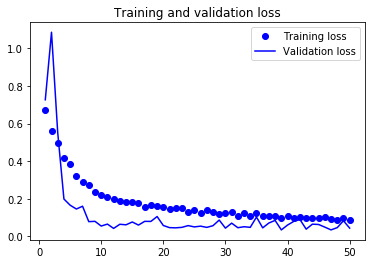

In [26]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import os, shutil

original_Conventional_dataset_dir = '/Users/jdlue/Downloads/Spitzy_Data/Conventional'
original_Spitz_dataset_dir = '/Users/jdlue/Downloads/Spitzy_Data/Spitz'
base_dir = '/Users/jdlue/Downloads/All_Data3'
# os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(validation_dir)
# os.mkdir(train_dir)
# os.mkdir(test_dir)
train_Conventional_dir = os.path.join(train_dir, 'Conventional')
# os.mkdir(train_Conventional_dir)
train_Spitz_dir = os.path.join(train_dir, 'Spitz')
# os.mkdir(train_Spitz_dir)
validation_Conventional_dir = os.path.join(validation_dir, 'Conventional')
# os.mkdir(validation_Conventional_dir)
validation_Spitz_dir = os.path.join(validation_dir, 'Spitz')
# os.mkdir(validation_Spitz_dir)
test_Conventional_dir = os.path.join(test_dir, 'Conventional')
# os.mkdir(test_Conventional_dir)
test_Spitz_dir = os.path.join(test_dir, 'Spitz')
# os.mkdir(test_Spitz_dir)
x = 0
# fnames = ['Conventional ({}).jpg'.format(i) for i in range(1, 5000)]
# for fname in fnames:
#     src = os.path.join(original_Conventional_dataset_dir, fname)
#     dst = os.path.join(validation_Conventional_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['Conventional ({}).jpg'.format(i) for i in range(5001, 17000)]
# for fname in fnames:
#     src = os.path.join(original_Conventional_dataset_dir, fname)
#     dst = os.path.join(train_Conventional_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['Conventional ({}).jpg'.format(i) for i in range(17001, 18295)]
# for fname in fnames:
#     src = os.path.join(original_Conventional_dataset_dir, fname)
#     dst = os.path.join(test_Conventional_dir, fname)
#     shutil.copyfile(src, dst)
    
# fnames = ['Spitz ({}).jpg'.format(i) for i in range(1, 16000)]
# for fname in fnames:
#     src = os.path.join(original_Spitz_dataset_dir, fname)
#     dst = os.path.join(train_Spitz_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['Spitz ({}).jpg'.format(i) for i in range(16001, 21000)]
# for fname in fnames:
#     src = os.path.join(original_Spitz_dataset_dir, fname)
#     dst = os.path.join(validation_Spitz_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['Spitz ({}).jpg'.format(i) for i in range(21001, 21752)]
# for fname in fnames:
#     src = os.path.join(original_Spitz_dataset_dir, fname)
#     dst = os.path.join(test_Spitz_dir, fname)
#     shutil.copyfile(src, dst)

from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))                            
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])



from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
     train_dir,
     target_size=(150, 150),
     batch_size=40,
     class_mode=('binary'))

    
validation_generator = test_datagen.flow_from_directory(
     test_dir,
     target_size=(150, 150),
     batch_size=25,
     class_mode='binary')

for data_batch, labels_batch in train_generator:
     print('data batch shape:', data_batch.shape)
     print('labels batch shape:', labels_batch.shape)
     break

history = model.fit_generator(
     train_generator,
     steps_per_epoch=150,
     epochs=50,
     validation_data=validation_generator,
     validation_steps=50)

model.save('Sptizy_Train_Dropout_.75_.h7')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



Found 27998 images belonging to 2 classes.
Found 9998 images belonging to 2 classes.
data batch shape: (50, 150, 150, 3)
labels batch shape: (50,)
Epoch 1/12
150/150 [==============================] - 35s 237ms/step - loss: 0.0590 - acc: 0.9788 - val_loss: 0.1200 - val_acc: 0.9693
Epoch 2/12
150/150 [==============================] - 35s 236ms/step - loss: 0.0591 - acc: 0.9784 - val_loss: 0.1058 - val_acc: 0.9702
Epoch 3/12
150/150 [==============================] - 34s 228ms/step - loss: 0.0568 - acc: 0.9807 - val_loss: 0.1372 - val_acc: 0.9656
Epoch 4/12
150/150 [==============================] - 34s 225ms/step - loss: 0.0585 - acc: 0.9783 - val_loss: 0.1872 - val_acc: 0.9436
Epoch 5/12
150/150 [==============================] - 34s 223ms/step - loss: 0.0532 - acc: 0.9804 - val_loss: 0.2949 - val_acc: 0.9250
Epoch 6/12
150/150 [==============================] - 33s 218ms/step - loss: 0.0578 - acc: 0.9784 - val_loss: 0.1751 - val_acc: 0.9564
Epoch 7/12
150/150 [=======================

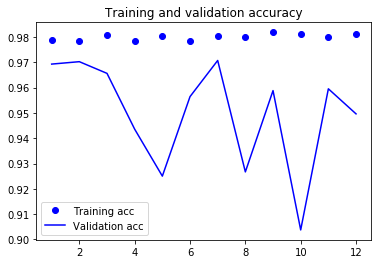

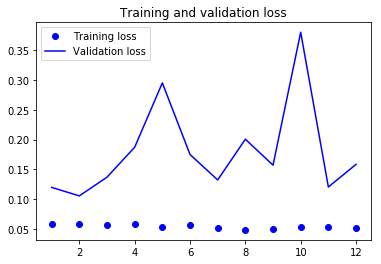

In [24]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import os, shutil

original_Conventional_dataset_dir = '/Users/jdlue/Downloads/Spitzy_Data/Conventional'
original_Spitz_dataset_dir = '/Users/jdlue/Downloads/Spitzy_Data/Spitz'
base_dir = '/Users/jdlue/Downloads/All_Data3'
# os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(validation_dir)
# os.mkdir(train_dir)
# os.mkdir(test_dir)
train_Conventional_dir = os.path.join(train_dir, 'Conventional')
# os.mkdir(train_Conventional_dir)
train_Spitz_dir = os.path.join(train_dir, 'Spitz')
# os.mkdir(train_Spitz_dir)
validation_Conventional_dir = os.path.join(validation_dir, 'Conventional')
# os.mkdir(validation_Conventional_dir)
validation_Spitz_dir = os.path.join(validation_dir, 'Spitz')
# os.mkdir(validation_Spitz_dir)
test_Conventional_dir = os.path.join(test_dir, 'Conventional')
# os.mkdir(test_Conventional_dir)
test_Spitz_dir = os.path.join(test_dir, 'Spitz')
# os.mkdir(test_Spitz_dir)

from keras import layers
from keras import models
from keras import optimizers
keras.models.load_model('Sptizy_Train_Dropout_.75_.h7')


from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
     train_dir,
     target_size=(150, 150),
     batch_size=50,
     class_mode=('binary'))

    
validation_generator = test_datagen.flow_from_directory(
     validation_dir,
     target_size=(150, 150),
     batch_size=35,
     class_mode='binary')

for data_batch, labels_batch in train_generator:
     print('data batch shape:', data_batch.shape)
     print('labels batch shape:', labels_batch.shape)
     break

history = model.fit_generator(
     train_generator,
     steps_per_epoch=150,
     epochs=12,
     validation_data=validation_generator,
     validation_steps=120)

model.save('Sptizy_Train_Dropout_Cont_1.h7')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


